In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
df=pd.read_csv("Netflix.csv")
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9076.0,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,7884.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2365542.0,NaN
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1245068.0,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,524834.0,NaN
...,...,...,...,...,...,...,...,...
21220,NaN,tv,"Animation, Comedy",2023.0,NaN,NaN,NaN,NaN
21221,Bleach: Thousand-Year Blood War,tv,"Action, Adventure, Animation",2022.0,tt14986406,9.0,59448.0,NaN
21222,NaN,tv,Reality,2025.0,NaN,NaN,NaN,NaN
21223,NaN,tv,Reality,2013.0,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()

title                   694
type                      0
genres                  365
releaseYear              39
imdbId                 1580
imdbAverageRating      1765
imdbNumVotes           1765
availableCountries    21064
dtype: int64

In [14]:
#handling missing data
df = df.dropna(subset=['title'])
df['genres']=df["genres"].fillna("Not Available")
df['availableCountries']=df["availableCountries"].fillna("Not Available")
df['releaseYear']=df['releaseYear'].fillna("Unknown")
df=df.dropna(subset=['imdbId','imdbNumVotes','imdbAverageRating'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19460 entries, 0 to 21221
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               19460 non-null  object 
 1   type                19460 non-null  object 
 2   genres              19460 non-null  object 
 3   releaseYear         19460 non-null  object 
 4   imdbId              19460 non-null  object 
 5   imdbAverageRating   19460 non-null  float64
 6   imdbNumVotes        19460 non-null  float64
 7   availableCountries  19460 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.3+ MB


In [6]:
df.describe()

,imdbAverageRating,imdbNumVotes
count,19460.000000,1.946000e+04
mean,6.400236,3.174898e+04
std,1.094151,1.209459e+05
min,1.200000,5.000000e+00
25%,5.700000,3.290000e+02
50%,6.500000,1.602000e+03
75%,7.200000,1.016700e+04
max,9.800000,3.026750e+06


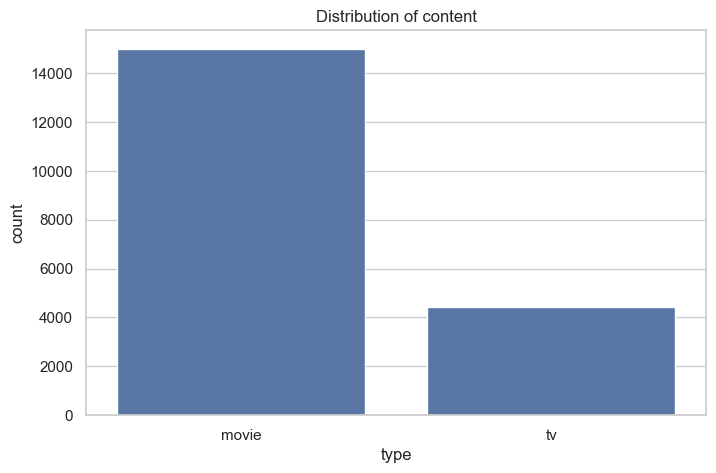

In [7]:
#countplot for content type
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='type')
plt.title("Distribution of content")
plt.show()

In [8]:
#Splitting genres by 
df['genres'] = df['genres'].str.split(', ')
#Explode the genres into separate rows
genres_exploded = df['genres'].explode()

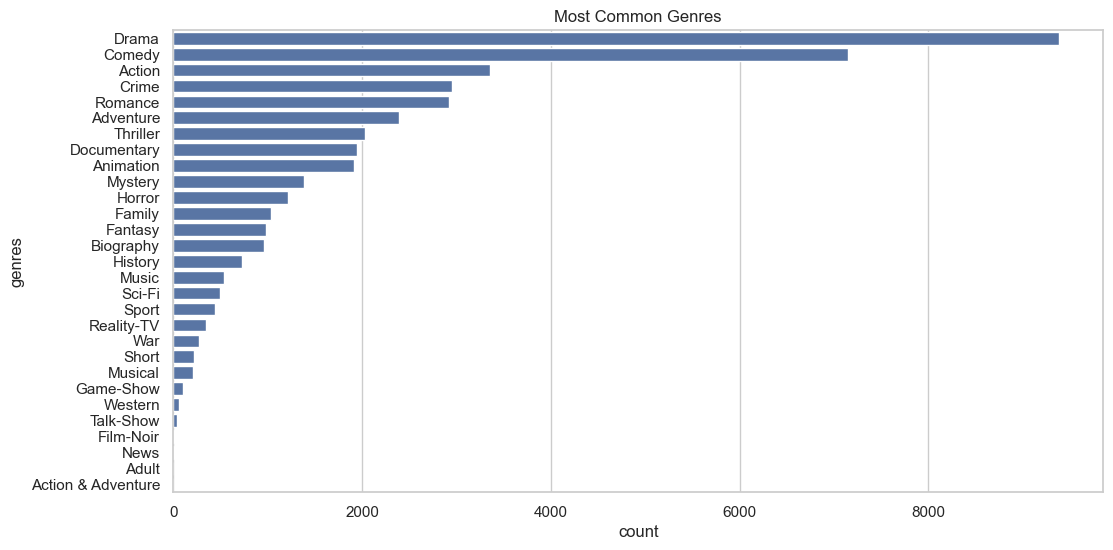

In [9]:
# Q3.What is the most common genre
plt.figure(figsize=(12,6))
sns.countplot(y=genres_exploded, order=genres_exploded.value_counts().index)
plt.title('Most Common Genres')
plt.show()

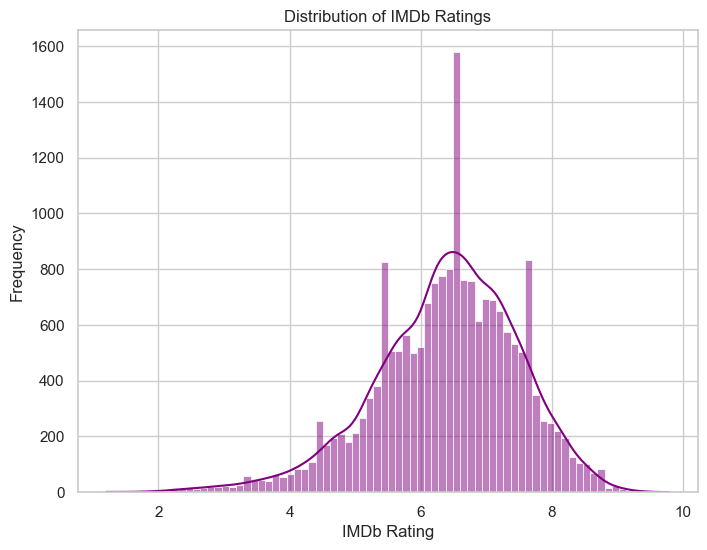

In [10]:
# Q What is the distribution of IMDb ratings?
plt.figure(figsize=(8, 6))
sns.histplot(df['imdbAverageRating'], kde=True, color='purple')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()


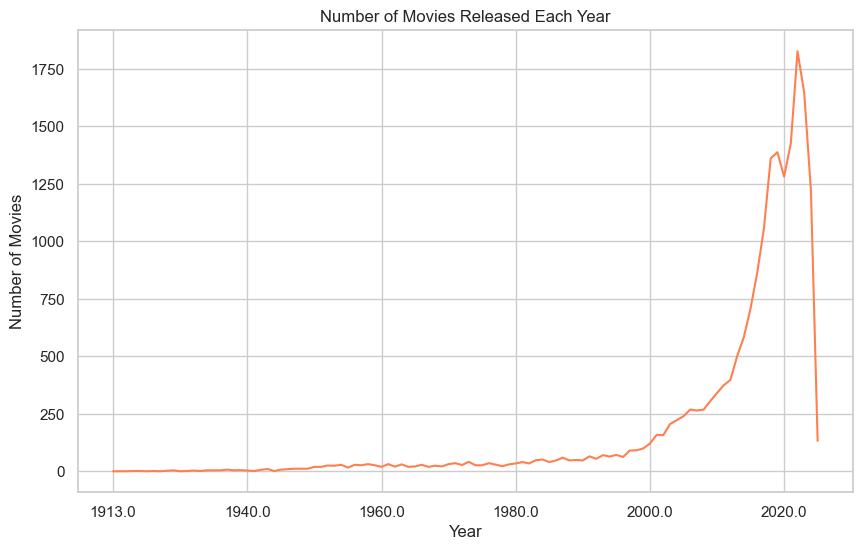

In [11]:
# Q. How many movies released each year
release_counts = df['releaseYear'].value_counts().sort_index()

# Plot the release counts
plt.figure(figsize=(10, 6))
release_counts.plot(kind='line', color='coral')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


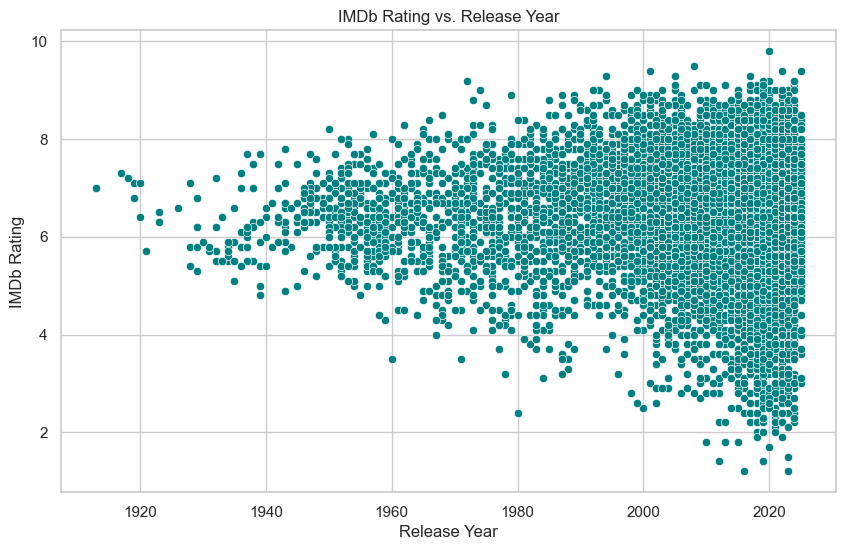

In [12]:
# Relationship of movies over years ith the Imdb Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='releaseYear', y='imdbAverageRating', data=df, color='teal')
plt.title('IMDb Rating vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('IMDb Rating')
plt.show()
